# CS 273A, Machine Learning
## Homework 2
Brooke Ryan

In [928]:
import numpy as np
import mltools as ml
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
# %matplotlib inline
plt.style.use('/Users/brookeryan/Developer/CS273A Homework/seawitch.mplstyle')

# Problem 1: Linear Regression

In [929]:
data = np.genfromtxt("/Users/brookeryan/Developer/CS273A Homework/data/curve80.txt",
                     delimiter=None)  # load the text file
X = data[:, 0]  # column 1, scalar feature x values
X = np.atleast_2d(X).T  # code expects shape (M,N) so make sure it’s 2-dimensional
Y = data[:, 1]  # column 2, doesn’t matter for Y

Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)  # split data set 75/25

## 1) Print the shapes of these four objects.

In [930]:
print("Xtr shape = {s}".format(s=Xtr.shape))
print("Xte shape = {s}".format(s=Xte.shape))
print("Ytr shape = {s}".format(s=Ytr.shape))
print("Yte shape = {s}".format(s=Yte.shape))

Xtr shape = (60, 1)
Xte shape = (20, 1)
Ytr shape = (60,)
Yte shape = (20,)


## 2) Use the provided linearRegress class to create a linear regression predictor of $y$ given $x$.

In [931]:
lr = ml.linear.linearRegress(Xtr, Ytr)  # create and train model
xs = np.linspace(0, 10, 200)  # densely sample 200 evenly-spaced x-values from 0 to 10
xs = xs[:, np.newaxis]  # force "xs" to be an Mx1 matrix (M data points with 1 feature)
ys = lr.predict(xs)  # make predictions at xs

### (a) Plot the training data points along with your prediction function in a single plot. (10 points)

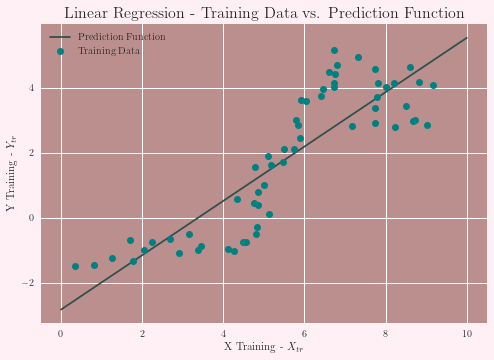

In [932]:
fig, ax = plt.subplots()
ax.set_title('Linear Regression - Training Data vs. Prediction Function')
ax.set_xlabel('X Training - $X_{tr}$')
ax.set_ylabel('Y Training - $Y_{tr}$')
ax.plot(xs, ys, label='Prediction Function')
ax.plot(Xtr, Ytr, 'o', label='Training Data')
ax.legend()
plt.show()

### (b) Print the linear regression coefficients (`lr.theta`) ...

In [933]:
print("------------------------------")
print("Linear Regression Coefficients")
print("------------------------------")
print("{t0}".format(t0=lr.theta))

------------------------------
Linear Regression Coefficients
------------------------------
[[-2.82765049  0.83606916]]


### (b) ... and verify that they match your plot. (5 points)
$\Theta_0$ should match the y-intercept of the prediction function, and $\Theta_1$ should match the slope of the prediction function.

To visually verify the y-intercept, we plot the $\Theta_0$ and verify it does indeed match the y-intercept of the prediction function line.

To visually verify that $\Theta_1$ is indeed the slope $m$ of the line $y = mx + \Theta_0$, we plot the line $ y = \Theta_1*x + c*\Theta_0$.  ($c$ is simply set to some convenient constant.)
Since the lines are parallel, the linear regression coefficients have been successfully verified.

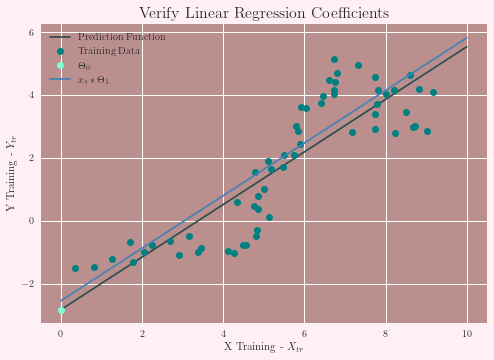

In [934]:
ax.set_title('Verify Linear Regression Coefficients')
ax.plot(0, lr.theta[0, 0], 'o', label=r"$\Theta_0$")
ax.plot(xs, xs*lr.theta[0,1] + lr.theta[0,0]*0.9, label=r"$x_s*\Theta_1$")
ax.legend()
display(fig)

### (c) What is the mean squared error of the predictions on the training and test data? (10 points)

In [935]:
print("-----------------")
print("Mean square error")
print("-----------------")
print("Training data: {m}".format(m=lr.mse(Xtr, Ytr)))
print("Test data: {m}".format(m=lr.mse(Xte, Yte)))

-----------------
Mean square error
-----------------
Training data: 1.127711955609391
Test data: 2.2423492030101246


## 3) Train models of degree $d = 1, 3, 5, 7, 10, 18 $:

### (a) Plot their learned prediction functions $f(x)$ (15 points)

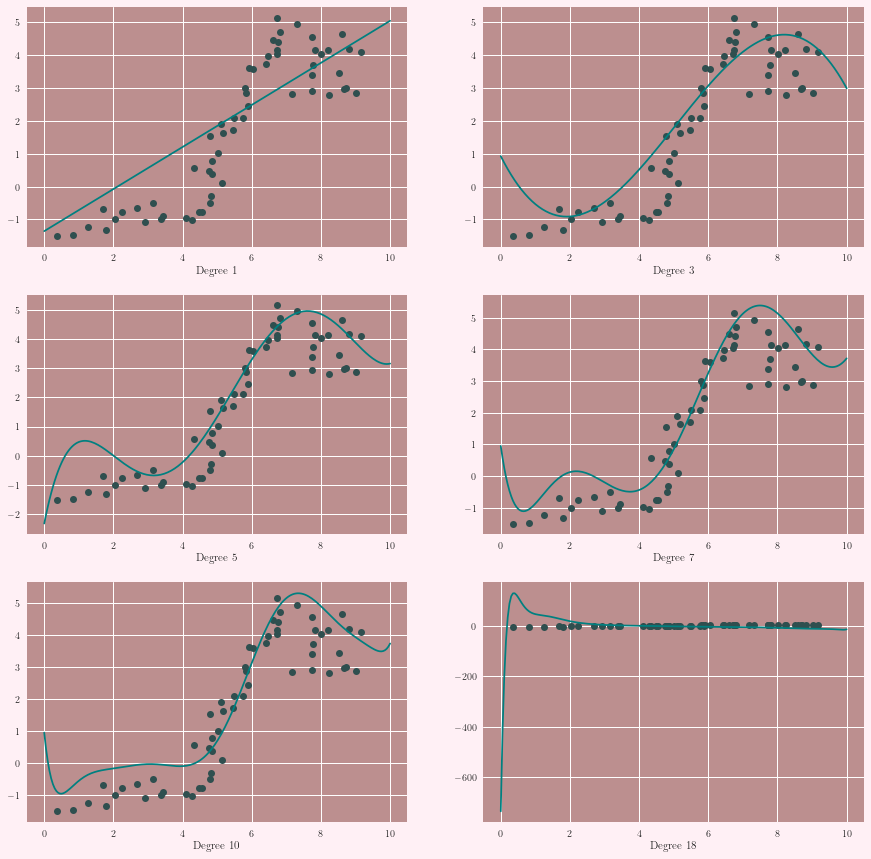

In [936]:
# Define a function "Phi(X)" which outputs the expanded and scaled feature matrix:
def Phi(X):
  return ml.transforms.rescale(ml.transforms.fpoly(X, degree, False), params)[0]

degrees = [1, 3, 5, 7, 10, 18]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
mseTr = np.zeros(len(degrees))
mseTe = np.zeros(len(degrees))

for i, degree in enumerate(degrees):
    params = (None, None)
    lr = ml.linear.linearRegress( Phi(Xtr), Ytr ) # create and train model
    YsHat = lr.predict(Phi(xs))
    ax[i//2][i%2].plot(Xtr, Ytr, 'o')
    ax[i//2][i%2].plot(xs, YsHat)
    ax[i//2][i%2].set_xlabel("Degree {s}".format(s=degree))

    mseTr[i] = lr.mse(Phi(Xtr), Ytr)
    mseTe[i] = lr.mse(Phi(Xte), Yte)

plt.show()

### (b) Plot their training and test errors on a log scale (`semilogy`) as a function of the degree. (10 points)

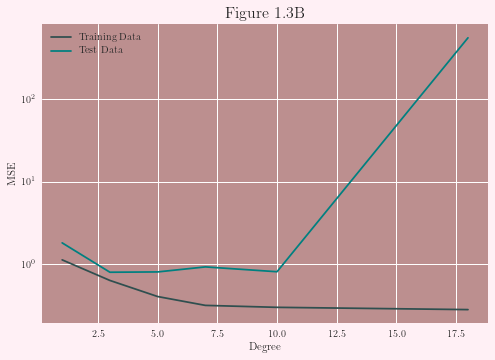

In [937]:
plt.semilogy(degrees, mseTr, label="Training Data")
plt.semilogy(degrees, mseTe, label="Test Data")
plt.legend()
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.title("Figure 1.3B")
plt.show()

### (c) What polynomial degree do you recommend? (5 points)

In [938]:
print("-----------------")
print("Mean square error")
print("-----------------")
for i, degree in enumerate(degrees):
    print("Degree {d}".format(d=degree))
    print("Training data MSE = {x}".format(x=mseTr[i]))
    print("Test data MSE = {x}\n".format(x=mseTe[i]))

-----------------
Mean square error
-----------------
Degree 1
Training data MSE = 1.127711955609391
Test data MSE = 1.8136374508088071

Degree 3
Training data MSE = 0.6339652063119634
Test data MSE = 0.7976826653665616

Degree 5
Training data MSE = 0.4042489464459202
Test data MSE = 0.8046590350824738

Degree 7
Training data MSE = 0.31563467398921313
Test data MSE = 0.9260423961359698

Degree 10
Training data MSE = 0.29894797968196857
Test data MSE = 0.8089269929986687

Degree 18
Training data MSE = 0.28045994291281523
Test data MSE = 561.2095227442771



Based on the graph in figure 1.3B, as well as the numerical calculations above, **degree 10** presents itself as the ideal polynomial degree.
This is because it has the lowest amount of error on training data and nearly the lowest amount on the test data, which positions it nicely between overfitting and underfitting.
Models below degree 10 are *underfitted*, and models above degree 10 are *overfitted*.

# Problem 2: Cross Validation

## 1) Plot the five-fold cross-validation error and test error (with `semilogy`, as before) as a function of degree. (10 points)

-----------------
Mean square error
-----------------
MSE Cross Validation Degree 1 = 1.3972403533213984
MSE Cross Validation Degree 3 = 1.1838033708514646
MSE Cross Validation Degree 5 = 1.312028734218474
MSE Cross Validation Degree 7 = 1.2180975844837025
MSE Cross Validation Degree 10 = 1.3802657240832257
MSE Cross Validation Degree 18 = 482598.5791119697


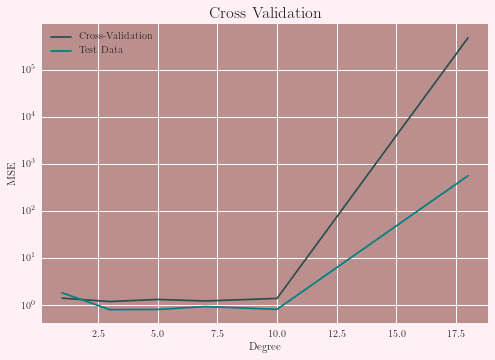

In [939]:
mseCV = np.zeros(len(degrees))
nFolds = 5

print("-----------------")
print("Mean square error")
print("-----------------")
for i, degree in enumerate(degrees):
    folds_MSE = np.zeros(nFolds)
    for f in range(nFolds):
        Xti, Xva, Yti, Yva = ml.crossValidate(Xtr, Ytr, nFolds, f)
        l = ml.linear.linearRegress(Phi(Xti), Yti)
        folds_MSE[f] = l.mse(Phi(Xva), Yva)
    mseCV[i] = np.mean(folds_MSE)
    print("MSE Cross Validation Degree {i} = {x}".format(i=degree, x=mseCV[i]))

plt.semilogy(degrees, mseCV, label="Cross-Validation")
plt.semilogy(degrees, mseTe, label="Test Data")
plt.legend()
plt.title("Cross Validation")
plt.xlabel("Degree")
plt.ylabel("MSE")

plt.show()

### 2) How do the MSE estimates from five-fold cross-validation compare to the MSEs evaluated on the actual test data (Problem 1)? (5 points)

Overall, the shape of the graph is largely similar.  There is a relatively flat line between degrees 1 and 10, and after 10, the graph sharply increases.
Taking a more granular look at the values, we can begin to observe the differences. When the degree $\leq$ 10, the MSE estimates from five-fold cross-validation tend to be slightly larger and have less variation than the MSEs evaluated on the actual test data.
When the degree is $>$ 10, there becomes a sharp increase in the values, and the five-fold cross-validation error increased faster than that of the actual test data as degree increases.


### 3) Which polynomial degree do you recommend based on five-fold cross-validation error? (5 points)

Degree 3 exhibits the lowest error, therefore I would recommend that.

### 4) For the degree that you picked in step 3, plot the cross-validation error as the number of folds is varied (`nFolds = 2, 3, 4, 5, 6, 10, 12, 15`), again with `semilogy`...

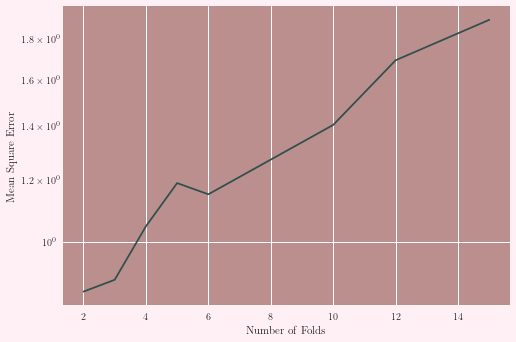

In [940]:
degree = 3
Folds = [2, 3, 4, 5, 6, 10, 12, 15]
eCVFold = np.zeros(len(Folds))

for i,n in enumerate(Folds):
    params = (None, None)
    J = np.zeros(n)
    # create a list to store the MSE of Xvi, Yvi for each iFold
    for iFold in range(n):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,n,iFold)
        # use ith block as validation
        learner = ml.linear.linearRegress(Phi(Xti),Yti)
        # train on Xti, Yti, the data for this fold
        J[iFold] = learner.mse(Phi(Xvi), Yvi)
        # compute the MSE on Xvi, Yvi and save it
    eCVFold[i] = np.mean(J)

plt.semilogy(Folds, eCVFold)
plt.xlabel('Number of Folds')
plt.ylabel('Mean Square Error')
plt.show()

### ... What pattern do you observe, and how do you explain it? (15 points)
Generally, the graph shows that as the number of folds increases, the cross-validation MSE also increases, save for a small dip when the number of folds = 6.

One pattern I observe is that this follows a similar pattern to the phenomenon of overfitting and underfitting machine learning models-- if the number of folds is too small or too large, it can lead to the phenomenon of overfitting or underfitting.  In the context of this homework, the fact that the error dips around folds=5-6 confirms this hypothesis further, because in the default folds training in problems 2 and 3 above, we utilized folds=5.

Additionally, Hal Daumé III, A Course in Machine Learning, states that while k=10 is the most commonly used k value, k=5 is used for efficiency reasons.